# Desafio 1

Para esse desafio, vamos trabalhar com o data set [Black Friday](https://www.kaggle.com/mehdidag/black-friday), que reúne dados sobre transações de compras em uma loja de varejo.

Vamos utilizá-lo para praticar a exploração de data sets utilizando pandas. Você pode fazer toda análise neste mesmo notebook, mas as resposta devem estar nos locais indicados.

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Set up_ da análise

In [145]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
black_friday = pd.read_csv("black_friday.csv")

<h1> Informações sobre o DATASET </h1>

In [130]:
black_friday.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [135]:
black_friday.shape

(537577, 12)

In [137]:
black_friday.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [141]:
black_friday.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [142]:
black_friday.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

<h1>Exploratory Data Analysis - EDA</h1>


Text(0.5, 1.0, 'Quantidade de compras realizadas por gênero e estado civil')

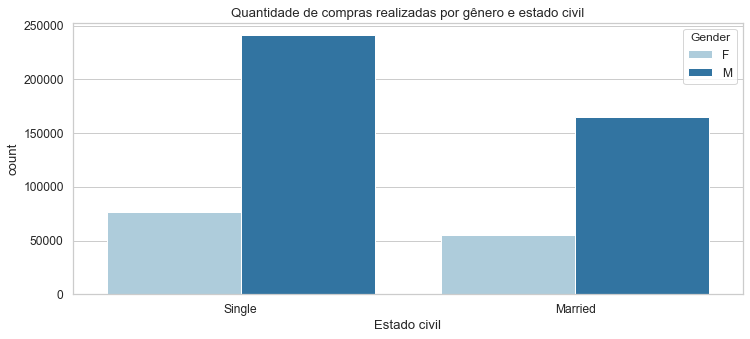

In [147]:
marital_gender = black_friday[['Gender', 'Marital_Status']]
marital_gender['Marital_Status'].replace(to_replace = [0, 1], value = ['Single', 'Married'], inplace=True)
sns.set(style='whitegrid', palette = 'Paired', font_scale=1.1, rc={"figure.figsize": [12, 5]})
sns.countplot(x='Marital_Status', hue='Gender', data=marital_gender)
plt.xlabel('Estado civil')
plt.title('Quantidade de compras realizadas por gênero e estado civil')

Text(0.5, 1.0, 'Consumo por faixa etária')

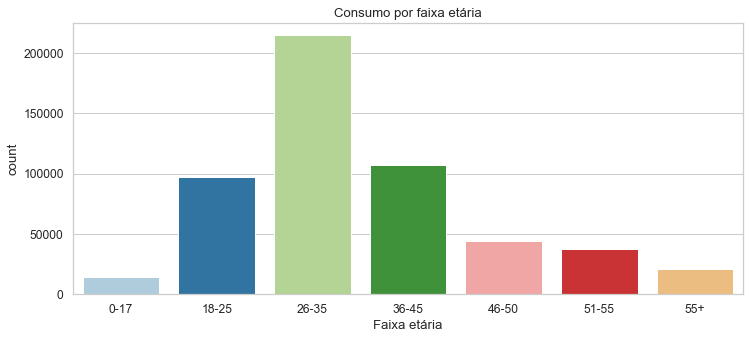

In [149]:
age_order = sorted(black_friday['Age'].unique())
sns.countplot(x='Age', order=age_order, data=black_friday)
plt.xlabel('Faixa etária')
plt.title('Consumo por faixa etária')

Text(0.5, 1.0, 'Gasto médio por faixa etária')

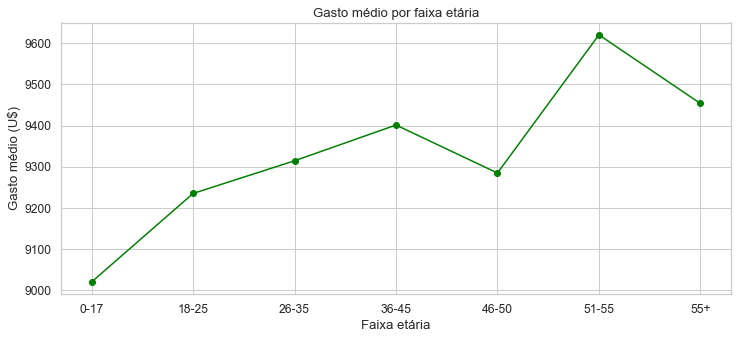

In [151]:
age_purchase = black_friday.groupby('Age')['Purchase'].mean()
age_purchase = pd.DataFrame({'Age':age_purchase.index, 'Average_purchase':age_purchase.values})
plt.plot('Age', 'Average_purchase', 'go-', data=age_purchase, )
plt.xlabel('Faixa etária')
plt.ylabel('Gasto médio (U$)')
plt.title('Gasto médio por faixa etária')

Text(0.5, 1.0, 'Consumo por tempo de permanência')

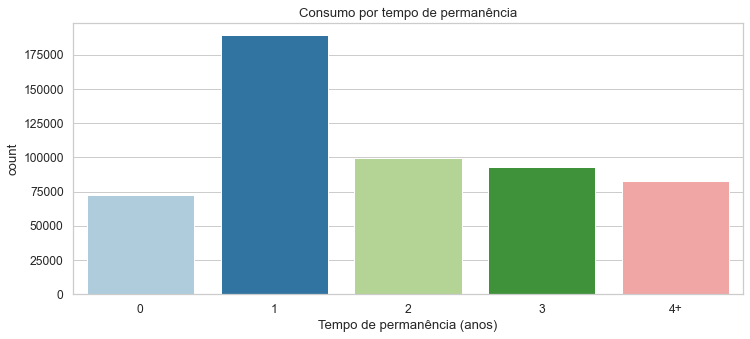

In [153]:

current_order = sorted(black_friday['Stay_In_Current_City_Years'].unique())
sns.countplot(x='Stay_In_Current_City_Years', order=current_order, data=black_friday)
plt.xlabel('Tempo de permanência (anos)')
plt.title('Consumo por tempo de permanência')

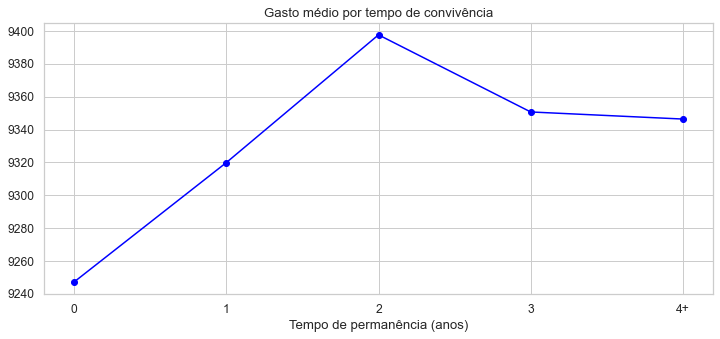

In [154]:
stay_purchase = black_friday.groupby('Stay_In_Current_City_Years')['Purchase'].mean()
stay_purchase = pd.DataFrame({'Stay_In_Current_City_Years':stay_purchase.index, 'Average_purchase':stay_purchase.values})
plt.plot('Stay_In_Current_City_Years', 'Average_purchase', 'bo-', data=stay_purchase)
plt.xlabel('Tempo de permanência (anos)')
plt.title('Gasto médio por tempo de convivência')

## Questão 1

Quantas observações e quantas colunas há no dataset? Responda no formato de uma tuple `(n_observacoes, n_colunas)`.

In [4]:
def q1():
    return black_friday.shape
    pass

In [5]:
q1()

(537577, 12)

## Questão 2

<b>Há quantas mulheres com idade entre 26 e 35 anos no dataset? Responda como um único escalar.</b>


O método query nos permite realizar consultas em nosso dataframe utilizando expressões booleanas. Neste caso, irei realizar uma consulta por mulheres (Gender == F) com idade entre 26 e 35 anos (Age == '26-35'). Como retorno, teremos um dataframe que satisfaz a condição anterior, porém precisamos obter o nº de observações deste dataframe. Para isso basta utilizarmos o atributo shape, acessando sua primeira posição

<pre><code> black_friday.query("Gender == 'F' & Age == '26-35'").shape[0] </code></pre>

In [115]:
def q2():
    return int(len(black_friday[(black_friday.Age =='26-35') & (black_friday.Gender == 'F')]))
    pass

In [116]:
q2()

49348

## Questão 3

Quantos usuários únicos há no dataset? Responda como um único escalar.

In [8]:
def q3():
    return black_friday.User_ID.nunique()
    pass

In [9]:
q3()

5891

## Questão 4

Quantos tipos de dados diferentes existem no dataset? Responda como um único escalar.

In [10]:
def q4():
    return black_friday.dtypes.nunique()
    pass

In [11]:
q4()

3

## Questão 5

Qual porcentagem dos registros possui ao menos um valor null (`None`, `ǸaN` etc)? Responda como um único escalar entre 0 e 1.

Para obter a porcentagem dos registros possuírem ao menos um valor nulo, iremos utilizar o conceito de probabilidade. A probabilidade de um evento ocorrer é dada por:
$$
Probabilidade = \frac{casos}{observacoes}
$$

Nossos casos favoráveis são a quantidade de registros que possuem ao menos um valor nulo, ou seja, a quantidade máxima de ocorrência de registros nulos em uma coluna. E para obtermos o número total de observações, basta acessarmos a primeira posição da tupla retornada por shape. Realizando a divisão de casos favoráveis pelo número total de observações, iremos obter um valor entre 0 e 1 (0 ≤ p ≤1) indicando a porcentagem dos registros possuírem ao menos um valor nulo.

In [12]:
def q5():
    return float(len(black_friday[black_friday.isnull().any(1)]) / len(black_friday))
    pass

In [68]:
 q5()

0.09140889842874857

## Questão 6

Quantos valores null existem na variável (coluna) com o maior número de null? Responda como um único escalar.

In [14]:
def q6():
    dfResult = pd.DataFrame({ "nome" : black_friday.columns, "isna": black_friday.isna().sum()})
    return int(dfResult[dfResult['isna'] == dfResult['isna'].max()]['isna'][0])
    pass

In [15]:
q6()

373299

## Questão 7

Qual o valor mais frequente (sem contar nulls) em `Product_Category_3`? Responda como um único escalar.

In [16]:
def q7():
    return int(black_friday['Product_Category_3'].value_counts(dropna=True, sort=True).index[0])
    pass

In [51]:
q7()

32148

16.0

## Questão 8

Qual a nova média da variável (coluna) `Purchase` após sua normalização? Responda como um único escalar.

Antes de obtermos a média da coluna Purchase, precisamos normalizá-la. Mas o que é normalização e qual sua função?

A grande maioria dos algoritmos de Machine Learning não funcionam tão bem quando atributos numéricos possuem escalas muito diferentes, como é o caso de Product_Category_1 (valores entre 1 e 18) e Purchase (valores entre 185 e 23961).

In [158]:
    min_max_scaler = MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(black_friday[['Purchase']].values)

In [159]:
def q8():
    return float(x_scaled.mean())
    pass

In [160]:
q8()

0.3847939036269795

## Questão 9

<li><b>Quantas ocorrências entre -1 e 1 inclusive existem da variáel `Purchase` após sua padronização? Responda como um único escalar.</b></li>
<br><br>

A outra forma dos atributos possuírem a mesma escala é através da técnica de padronização. A padronização não vincula os dados a um intervalo específico, como no escalonamento min-max. Ela subtrai o valor médio e, em seguida, divide pela variância. A padronização é feita através da fórmula z-score:

$$
z = \frac{x - \mu }{\sigma}
$$
Obs: A padronização é muito menos afetada por outliers em comparação com a normalização.

Assim como na transformação min-max, o Scikit-Learn também oferece um transformador para padronização, chamado StandardScaler.

In [155]:
standard = StandardScaler()
purchase_standardized = standard.fit_transform(black_friday['Purchase'].values.reshape(-1, 1))

In [156]:
def q9():
    return len(purchase_standardized[(purchase_standardized > -1) & (purchase_standardized < 1)])
    pass

In [157]:
q9()

348631

## Questão 10

Podemos afirmar que se uma observação é null em `Product_Category_2` ela também o é em `Product_Category_3`? Responda com um bool (`True`, `False`).

In [391]:
def q10():
    return bool(black_friday['Product_Category_2'].isna().sum() == black_friday['Product_Category_3'][(black_friday.Product_Category_2.isna() == True) & (black_friday.Product_Category_3.isna() == True)].isna().sum())
    pass

In [392]:
q10()

True